<a href="https://colab.research.google.com/github/arosha27/ML_Project_SMS_Spam_Classifier/blob/main/SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Download Dataset from Kaggle Using kagglehub and Get File Path

In [123]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


 ## 0.1 Define the Dataset Directory Path Using pathlib

In [124]:
from pathlib import Path

# Now this will work correctly
Data_Dir = Path("/kaggle/input/sms-spam-collection-dataset")

 ## 0.2 List All Files in the Dataset Directory

In [125]:
# List files and folders in the directory
for file in Data_Dir.iterdir():
    print(file.name)

spam.csv


## 0.3 Load the Dataset CSV File into a Pandas DataFrame

In [126]:
import pandas as pd
df = pd.read_csv(Data_Dir / "spam.csv" , encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Workflow:
1. Data Cleaning
2. EDA
3. Feature Engineering
4. Text Preprocessing
5. Model building
6. Evaluation
7. improvements
8. Website
9. Deployment

# 1. Data Cleaning:

In [127]:
df.info()
#in columns 2, 3, 4 we have a lot of null values . Thus removing those columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [128]:
#drop last three columns
df.drop(columns = ["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] , inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [129]:
#renaming the columns
df.rename(columns = {"v1": "Target" , "v2": "Text"} , inplace = True)

In [130]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
#from above preview of the data , we notice that the target column have two values i.e ham and spam , we need to convert them into numerical values like 0 and 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

df.sample(10)

,Target,Text
2506,0,Who u talking about?
4308,0,He dint tell anything. He is angry on me that ...
2914,0,Nothing lor... A bit bored too... Then y dun u...
3461,1,Bloomberg -Message center +447797706009 Why wa...
367,1,Here is your discount code RP176781. To stop f...
1541,0,Do u konw waht is rael FRIENDSHIP Im gving yuo...
2427,0,Do you think i can move &lt;#&gt; in a week
1670,0,Lmao!nice 1
1185,0,Annoying isn't it.
4999,0,Well its not like you actually called someone ...


In [132]:
#checking for null values
df.isnull().sum()

,0
Target,0
Text,0


In [133]:
#checking for duplicates
df.duplicated().sum()

np.int64(403)

In [134]:
df = df.drop_duplicates(keep = 'first')

In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
df.shape

(5169, 2)

# 2. EDA

When you doing any supervised learning task , you must have an understanding of the data and that understanding of data comes from Exploratory Data Analysis

In [137]:
#checking the distribution of target column like how many "ham" and how many "spam"

df["Target"].value_counts()

,count
Target,
0,4516
1,653


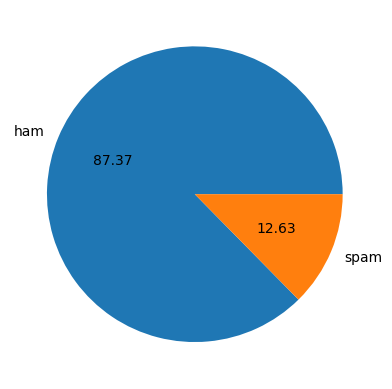

In [138]:
#for better undersatnding , visiualize it
import matplotlib.pyplot as plt

plt.pie(df["Target"].value_counts() , labels= ["ham" , "spam"] , autopct = "%0.2f")
plt.show()

**Note : From above distribution , it is evident that our data is imbalanced**

# 3. Feature Engineering

For deeper analysis , we are creating three new columns :
- number of characters in the SMS
- number of words in the SMS
- number of sentences in the SMS

In [175]:
#number of characters in the Text column
df["num_characters"] = df["Text"].apply(len)

/tmp/ipython-input-175-1367889349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df["Text"].apply(len)


In [176]:
df.head()

,Target,Text,num_characters,words_count,count_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1
1,0,Ok lar... Joking wif u oni...,29,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [177]:
#counting the words in each sms

import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")

df["words_count"] = df["Text"].apply(lambda x : len(tokenizer.tokenize(x)))


/tmp/ipython-input-177-156694752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["words_count"] = df["Text"].apply(lambda x : len(tokenizer.tokenize(x)))


In [178]:
df.head()


,Target,Text,num_characters,words_count,count_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1
1,0,Ok lar... Joking wif u oni...,29,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [179]:
#counting the total sentence in each text
from nltk.tokenize.punkt import PunktSentenceTokenizer

tokenizer = PunktSentenceTokenizer()
df["count_sentence"] = df["Text"].apply(lambda x : len(tokenizer.tokenize(x)))

/tmp/ipython-input-179-3899954074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count_sentence"] = df["Text"].apply(lambda x : len(tokenizer.tokenize(x)))


In [180]:
df.head()

,Target,Text,num_characters,words_count,count_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1
1,0,Ok lar... Joking wif u oni...,29,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [181]:
#checking the ham message
df[df["Target"]== 0][["num_characters" , "words_count" , "count_sentence"]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
words_count,4516.0,14.600974,11.448193,0.0,7.0,11.0,19.0,190.0
count_sentence,4516.0,1.767715,1.353829,1.0,1.0,1.0,2.0,38.0


In [182]:
#checking for spam message
df[df["Target"]==1][["num_characters" , "words_count" , "count_sentence"]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
words_count,653.0,25.595712,6.185684,2.0,24.0,27.0,29.0,40.0
count_sentence,653.0,2.970904,1.486363,1.0,2.0,3.0,4.0,9.0


In [ ]:
# from above information we get an idea that those messages which are spam have comparatively more number of characters , words and sentences present in them.

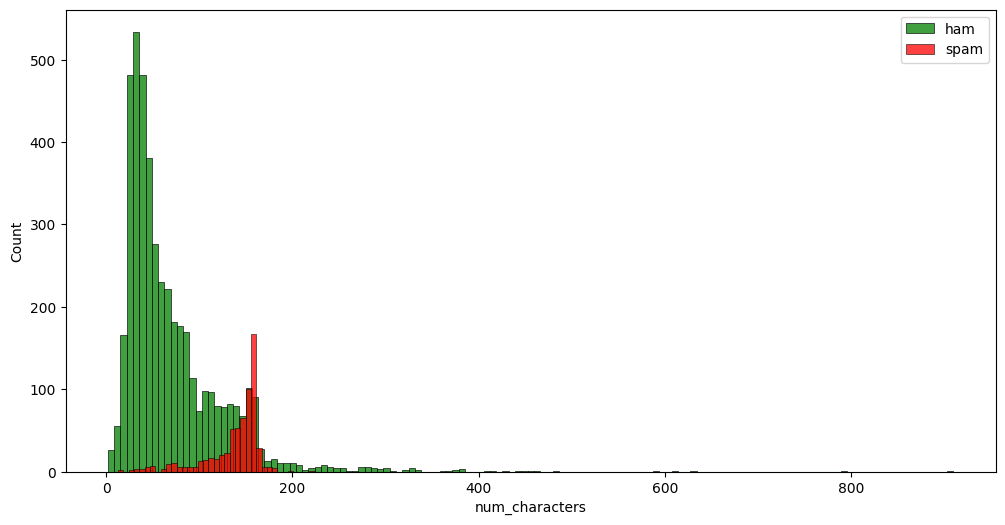

In [183]:
#Visiulaize above observations of ham and spam type sms
import seaborn as sns
plt.figure(figsize= (12,6))
sns.histplot(df[df["Target"]==0]["num_characters"] , color = "green" , label = "ham")
sns.histplot(df[df["Target"]==1]["num_characters"] , color = "red" , label = "spam")
plt.legend()
plt.show()

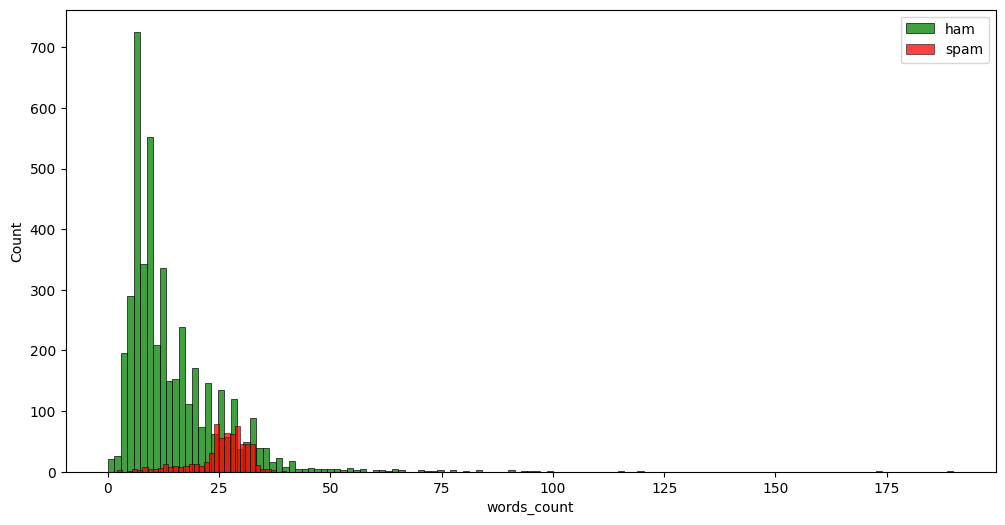

In [184]:
plt.figure(figsize= (12,6))
sns.histplot(df[df["Target"]==0]["words_count"] , color = "green" , label = "ham")
sns.histplot(df[df["Target"]==1]["words_count"] , color = "red" , label = "spam")
plt.legend()
plt.show()

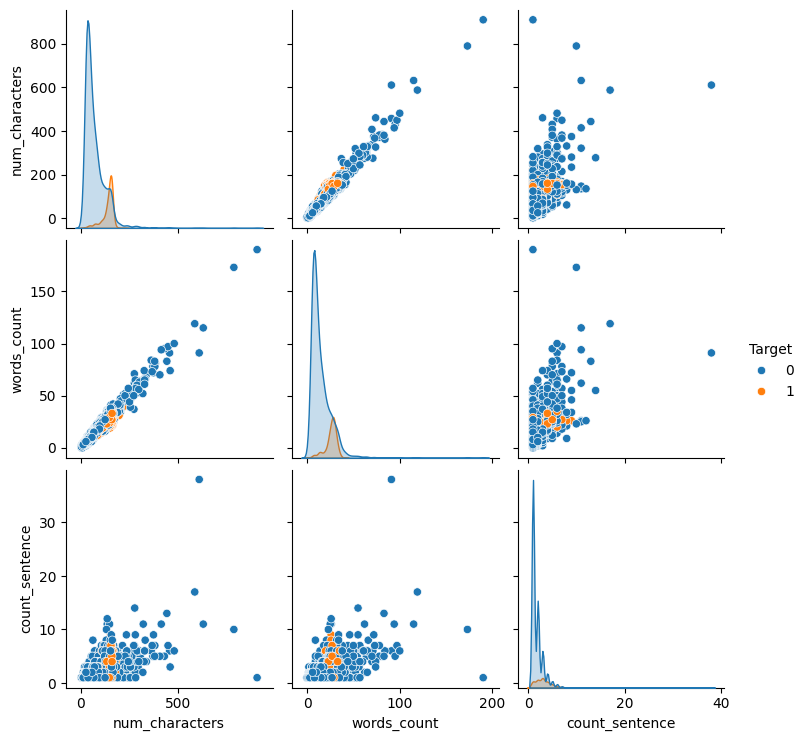

In [185]:
# finding the relationship among the variables
sns.pairplot(df, hue = "Target")
plt.show()

<Axes: >

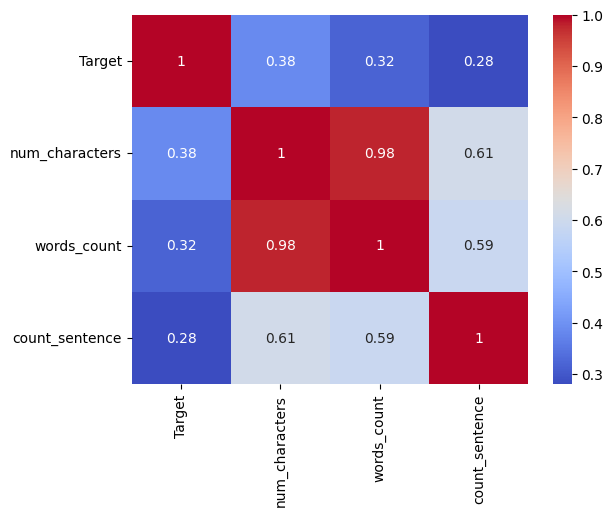

In [195]:
#correlation can only be found of the numerical columns

sns.heatmap(df.select_dtypes(include = "number").corr() , annot = True , cmap="coolwarm")

In [ ]:
# from above heatmap , we can observe that the correlation between the words_count and num_characters is 0.98 which means they are almost same.
#also the corelation between the num_characters and count_sentence is too high which means they are similar as well
# the target variable have the highest corelation with the num_characters as compare to others , thus usig only this column for modelling

# 4. Text Preprocessing
- lower case
- tokenization
- removing stop words and punctuations
- removing special characters
- Stemming


In [236]:
import string
import nltk
nltk.download("stopwords")
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#creating a function to handle above all
def transform_text(text):
  # to lower case
  text = text.lower()

  #tokeninzing

  from nltk.tokenize import RegexpTokenizer
  tokenizer = RegexpTokenizer(r"\w+")
  text = tokenizer.tokenize(text)

  #Removing stop words and punctuation
  y = []
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  #Removing special characters
  text= y[:]
  y.clear()
  for i in text:
    if i.isalnum():
      y.append(i)

    #Stemming
    text= y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [238]:
#applying the transform_text function to the text column

df["transformed_text"] = df["Text"].apply(transform_text)

/tmp/ipython-input-238-2472065041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df["Text"].apply(transform_text)


In [239]:
df.head()

,Target,Text,num_characters,words_count,count_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


### WordCloud for Spam Messages

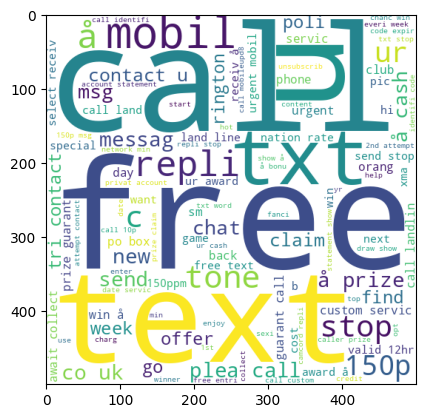

In [253]:
#creating a word cloud to get a better understanding of which words are present in messages
from wordcloud import WordCloud
wc = WordCloud( width = 500 , height= 500 , background_color = "white" , min_font_size = 10)

spam_wc = wc.generate(df[df["Target"]==1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)
plt.show()


Note : "Selects all the spam messages (Target == 1), extracts their transformed versions, and joins them into one long string separated by spaces."

### WordCloud for Ham Messages

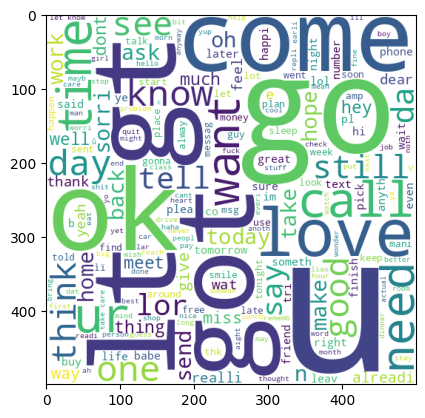

In [255]:
ham_wc = wc.generate(df[df["Target"]==0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)
plt.show()